<a href="https://colab.research.google.com/github/thiagotandrade/ds_project/blob/master/DS_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO: 

- Em cada linha, mudar o valor de 'fireplaceflag' para True se 'fireplacecnt' for diferente de NaN ou 0;
- Usar classificador e regressor para tratar dados faltantes;
- Escolher as melhores features (usar XGBoost, ver correlação entre variáveis e alvo).

# Projeto 1 da Disciplina Data Science 2019.1
# Competição do Kaggle: [Zillow Prize](https://www.kaggle.com/c/zillow-prize-1)

## Configurando ambiente

### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder

import missingno as msno

%matplotlib inline

### Lendo versão 2016 dos arquivos CSV

In [0]:
props = pd.read_csv('https://raw.githubusercontent.com/thiagotandrade/ds_project/master/Database/merged_2016v2.csv',
                    header=0, sep=',', quotechar='"')
props_bkp = props
props_cols = props.columns.tolist()

## 2. Pré-processamento dos dados

In [0]:
props.head().transpose()

,0,1,2,3,4
parcelid,17073783,17088994,17100444,17102429,17109604
airconditioningtypeid,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2.5,1,2,1.5,2.5
bedroomcnt,3,2,3,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN,NaN,NaN
calculatedbathnbr,2.5,1,2,1.5,2.5
decktypeid,NaN,NaN,NaN,NaN,NaN


In [0]:
props.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
airconditioningtypeid,28781.0,1.816372e+00,2.974168e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,57364.0,5.565407e+00,1.900602e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
decktypeid,658.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [0]:
# Não faz Sentido

# Inserir valor true na coluna 'fireplaceflag' se houve algum valor presente em fireplacecnt diferente de zero ou NaN
#props.loc[props['fireplacecnt'] != 0 | pd.notnull(props['fireplacecnt']),'fireplaceflag'] = "True"

### 2.1 Definição de tipos

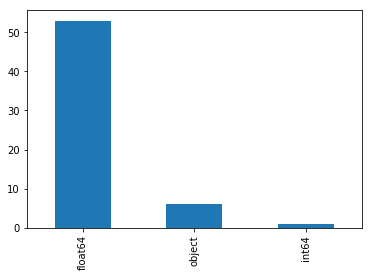

In [0]:
props.dtypes.value_counts().sort_values(ascending=False).plot.bar()

In [0]:
# Mudando colunas de tipo 'object' para tipo 'category'
object_type = props.select_dtypes(include=['object']).columns.values
props[object_type] = props[object_type].astype('category')

#Mudar tipo da coluna transaction date para 'datetime64'
props['transactiondate'] = pd.to_datetime(props['transactiondate'])

### 2.2 Tratamento de dados ausentes

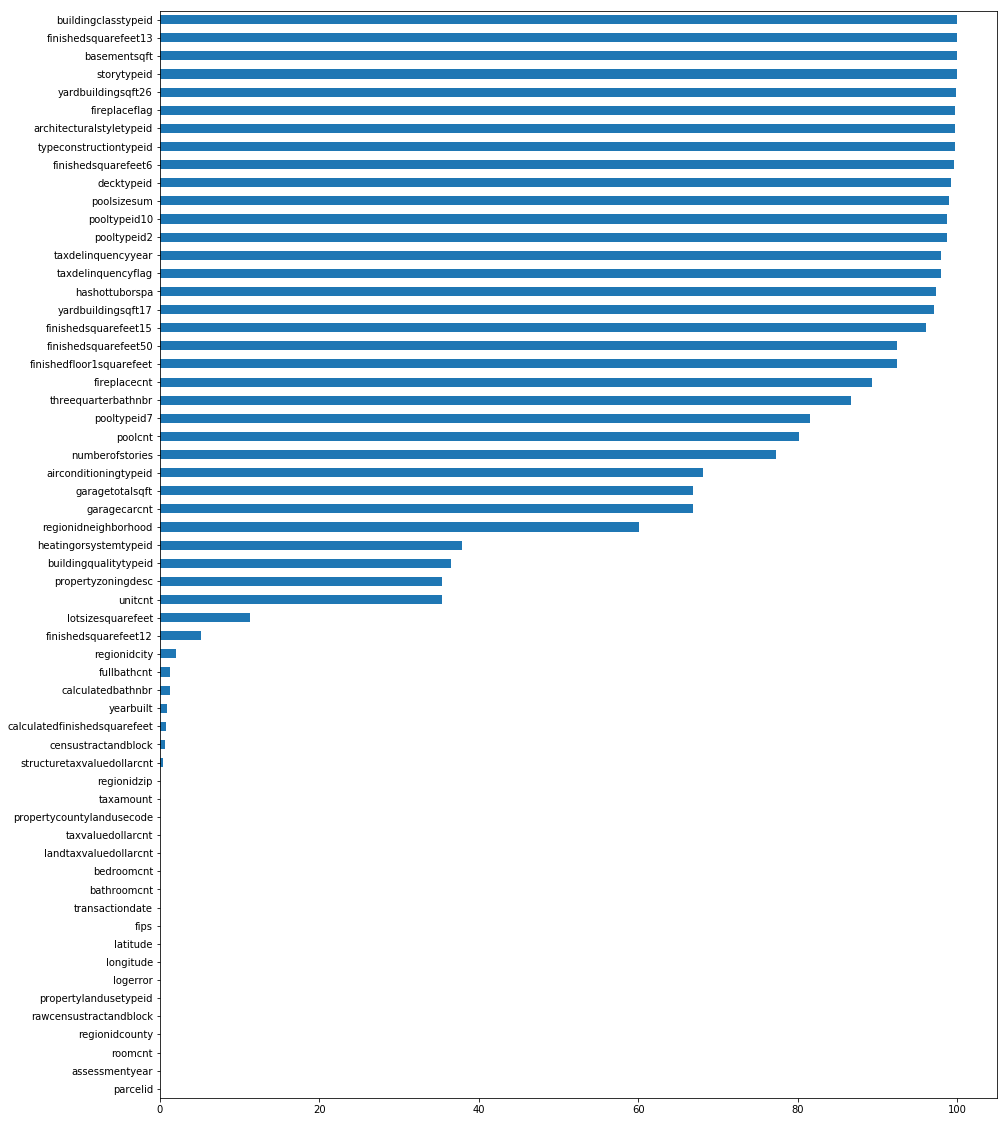

In [0]:
#Porcentagem de valores NaN em cada coluna
((props.isnull().sum()/len(props))*100).sort_values().plot.barh(figsize=(15,20))
#props.isnull().sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [0]:
#### 2.2.1 Remoção de dados

In [0]:
props.shape

(90275, 60)

Remoção de Instâncias

In [0]:
#df.dropna(thresh=2)   #Drop row if it does not have at least two values that are **not** NaN

#A coluna 'fireplaceflag' não adiciona nenhuma informação útil pois df já possui 'fireplacecnt', então removemos:
props.drop(['fireplaceflag'], axis=1, inplace=True)

# Remover colunas com mais de 50% de dados ausentes
props.dropna(thresh=(0.5*len(props.columns.values)) , axis=0, inplace=True)

#*********************AJUSTAR PARA COLUNAS QUE FAZEM SENTIDO*******************#
# Remover instâncias que não tem 'bathroomcnt'
props = props[pd.notnull(props['bathroomcnt'])]

# Remover instâncias que não tem 'bedroomcnt'
props = props[pd.notnull(props['bedroomcnt'])]


Remoção de colunas

In [0]:
# Remover colunas com mais de 70% de dados ausentes
props.dropna(thresh=0.70*len(props), axis=1, inplace=True)

In [0]:
props.shape

(86452, 28)

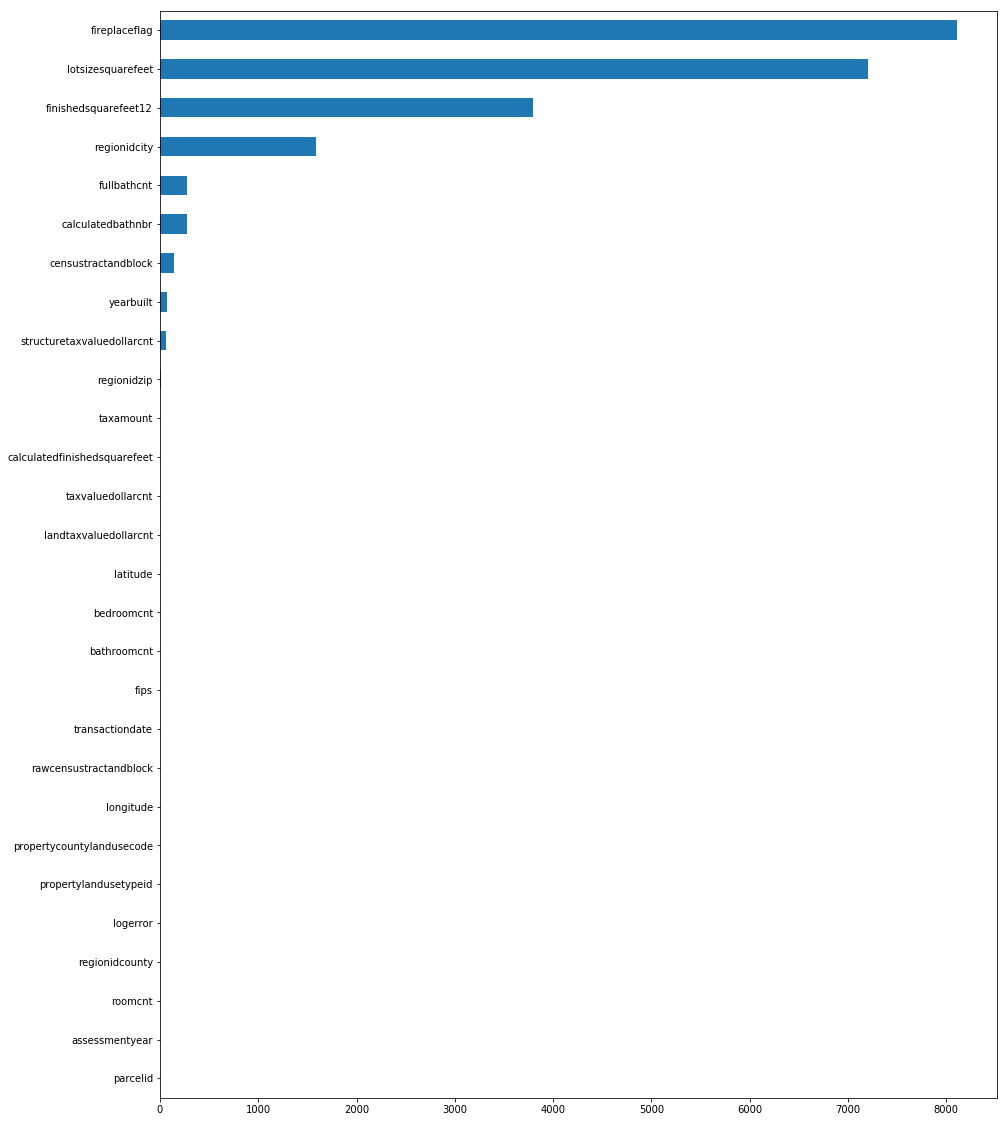

In [0]:
props.isnull().sum().sort_values().plot.barh(figsize=(15,20))

#### 2.2.2 Imputação de dados

##### Baseando-se correlação para medir algum impacto na imputação:

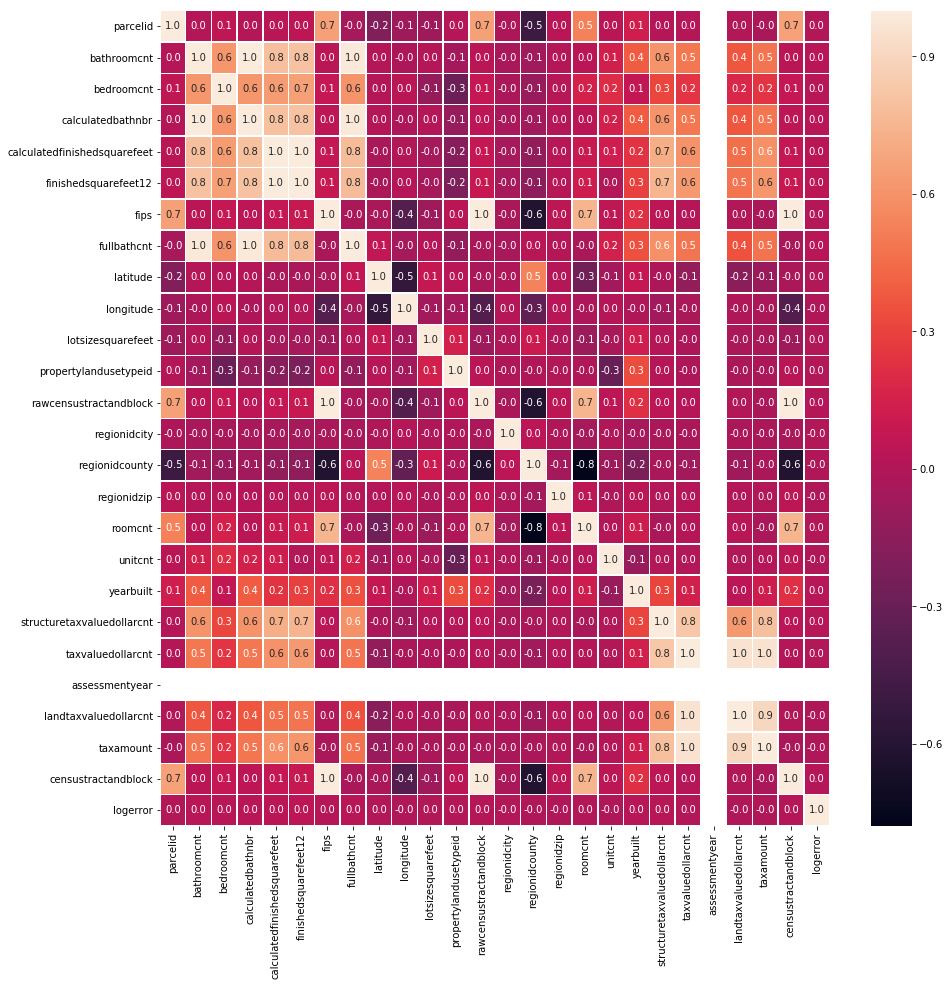

In [0]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(props.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

##### [Dados Categóricos](https://www.datacamp.com/community/tutorials/categorical-data)

In [0]:
cat_df_props = props.select_dtypes(include=['category']).copy()

In [0]:
cat_df_props.head()

,propertycountylandusecode,propertyzoningdesc
0,1128,NaN
1,1129,NaN
2,1111,NaN
3,1110,NaN
4,1111,NaN


In [0]:
print(cat_df_props.isnull().values.sum())
print(cat_df_props.isnull().sum())

24458
propertycountylandusecode        0
propertyzoningdesc           24458
dtype: int64


In [0]:
# Para a coluna propertycountylandusecode não precisamos de imputação, logo apenas transformamos as categorias para código
cat_df_props['propertycountylandusecode'] = cat_df_props['propertycountylandusecode'].cat.codes.astype('int16')
#cat_df_props['propertyzoningdesc'] = cat_df_props['propertyzoningdesc'].cat.codes.astype('int16')

Tentar usar o fancyimpute do sklearn para fazer a imputação com outros algoritmos fora o kNN

Usar kNN para imputação

In [0]:
cat_df_props['propertyzoningdesc'].cat.categories

Index(['1NR1*', '1NR3*', 'AH RM-CD*', 'AH RM-CD-F', 'AH RS(3)10', 'AH RS-(3)-',
       'AHA11*', 'AHA110000*', 'AHA21*', 'AHR110000*',
       ...
       'WVRPD112U*', 'WVRPD12U*', 'WVRPD12U-R', 'WVRPD17U*', 'WVRPD18U*',
       'WVRPD40000', 'WVRPD4OOOO', 'WVRPD56*', 'WVRR', 'WVRR1-RPD1'],
      dtype='object', length=1996)

In [0]:
#Para excluir

# Não podemos usar o one hot encoder pois precisariamos criar 240 novas colunas para um dataframe com 3 mi instâncias
#cat_df_props['propertycountylandusecode'].cat.categories

#prop_county_land_use_code = cat_df_props['propertycountylandusecode'].cat.codes
#prop_county_land_use_code

#lb_make = LabelEncoder()
#cat_df_props['propertycountylandusecode'] = lb_make.fit_transform(cat_df_props['propertycountylandusecode'])

##### Dados Numéricos

### 2.3 Normalização e discretização

#### 2.3.1 Discretização

#### 2.3.2 Normalização

### 2.4 Limpeza de dados

#### 2.4.1 Univariado

#### 2.4.2 Bivariado

#### 2.4.3 Multivariado

## Data Visualization

#### Properties Locations on Map

In [0]:
props['latitude'] /= 1e6
props['longitude'] /= 1e6

C:\Users\Thiago\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

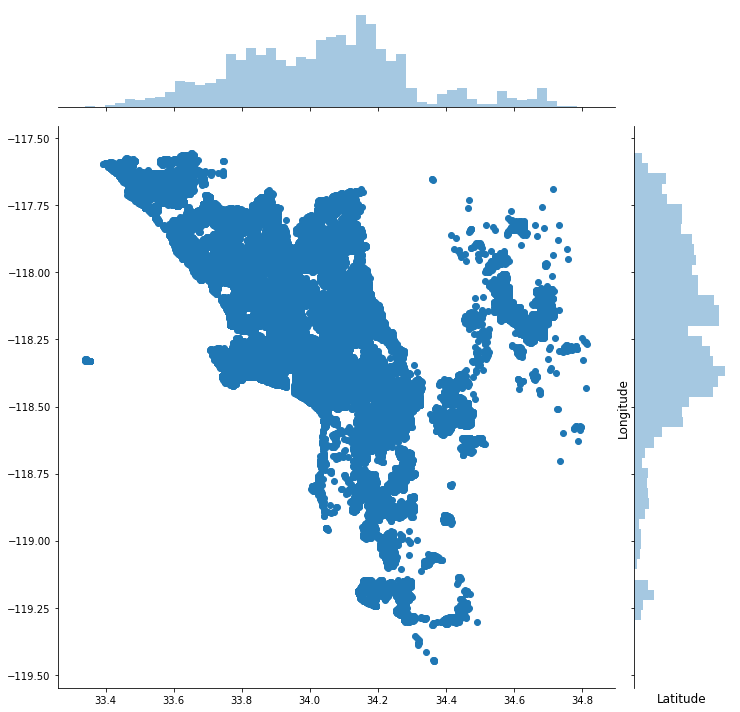

In [0]:
plt.figure(figsize=(12,12))
sns.jointplot(x=props.latitude.values, y=props.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [0]:
#Save for later

#props_train = pd.merge(props, train, on='parcelid', how='left')

#msno.dendrogram(props)

# Changing type of columns with Ids to unsigned short int
#id_columns = props.filter(regex='id').columns.values
#props[id_columns].astype('uint16')